In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

Text(0, 0.5, 'D/A')

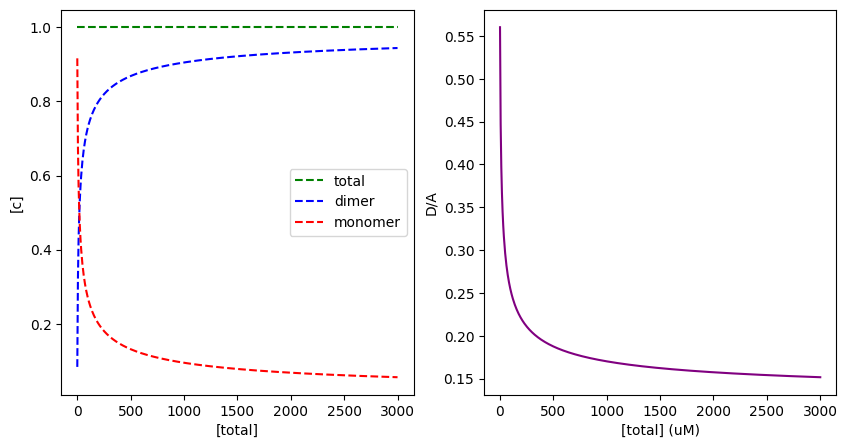

In [28]:
total = np.linspace(1,3000,500)
K_d = 20
DA_m = 0.6
DA_d = 0.25
monomer = (K_d-np.sqrt(K_d*K_d-4*(-2)*K_d*total))/-4 # Eq. 7
dimer = (total-monomer)/2 # Eq. 3
fig,ax = plt.subplots(1,2,figsize=[10,5])
ax[0].plot(total,(2*dimer+monomer)/total,'--',c='g',label='total')
ax[0].plot(total,2*dimer/total,'--',c='b',label='dimer')
ax[0].plot(total,monomer/total,'--',c='r',label='monomer')
ax[0].legend()
ax[0].set_xlabel('[total]')
ax[0].set_ylabel('[c]')
DA = monomer/total*DA_m + dimer/total*DA_d # Eq. 1
ax[1].plot(total,DA,c='purple')
ax[1].set_xlabel('[total] (uM)')
ax[1].set_ylabel('D/A')

In [30]:
def dimer(total,DA_m,DA_d,K_d):
    monomer = (K_d-np.sqrt(K_d*K_d-4*(-2)*K_d*total))/-4 # Eq. 7
    dimer = (total-monomer)/2 # Eq. 3
    DA = monomer/total*DA_m + dimer/total*DA_d # Eq. 1
    return(DA)

In [35]:
data = pd.read_csv('DA_vs_conc.csv')
print(data)

           conc       D/A
0       7.91616  0.318865
1       8.39325  0.317602
2       8.46506  0.303024
3       8.51330  0.324571
4       8.84579  0.377284
...         ...       ...
4979  264.89000  0.275648
4980  266.74500  0.257446
4981  267.00600  0.251763
4982  272.58400  0.228615
4983  281.75000  0.183674

[4984 rows x 2 columns]


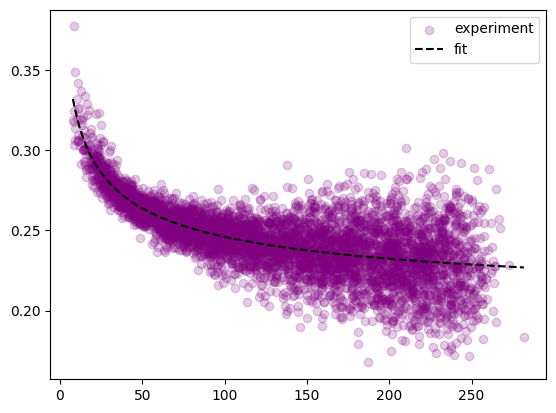

In [38]:
popt,pcov = optimize.curve_fit(dimer,data['conc'],data['D/A'])
plt.scatter(data['conc'],data['D/A'],c='purple',alpha=0.2,label='experiment')
plt.plot(data['conc'],dimer(data['conc'],*popt),'--',c='k',label='fit')
plt.legend()